In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("titanic.csv")
df = pd.get_dummies(df, drop_first=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
x = df.drop("Survived", axis=1)
y = df["Survived"]
x = x.astype(float)
x = x.fillna(x.mean())
y = y.fillna(y.mean())


In [27]:
m = len(df)
split_index = int(0.8 * m)

x_train = x.iloc[:split_index].values
y_train = y.iloc[:split_index].values

x_test = x.iloc[split_index:].values
y_test = y.iloc[split_index:].values

In [28]:
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)
sigma[sigma == 0] = 1

x_train = (x_train - mu) / sigma
x_test = (x_test - mu) / sigma

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x, w, b):
    z = np.dot(x, w) + b
    return sigmoid(z)

def compute_cost(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    epsilon = 1e-15  # avoid log(0)
    return (-1 / m) * np.sum(
        y * np.log(predictions + epsilon) +
        (1 - y) * np.log(1 - predictions + epsilon)
    )

def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    dj_dw = (1 / m) * np.dot(x.T, (predictions - y))
    dj_db = (1 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iters):
    cost_history = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost_history.append(compute_cost(x, y, w, b))
    return w, b, cost_history

In [30]:
n = x_train.shape[1]
w_init = np.zeros(n)
b_init = 0

alpha = 0.1
iters = 1000

w_final, b_final, cost_history = gradient_descent(
    x_train, y_train, w_init, b_init, alpha, iters
)

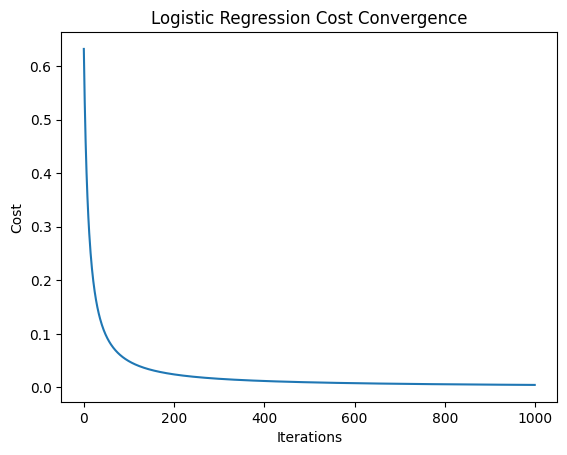

In [31]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Logistic Regression Cost Convergence")
plt.show()

In [32]:
train_predictions = predict(x_train, w_final, b_final)
test_predictions = predict(x_test, w_final, b_final)

In [33]:
train_labels = (train_predictions >= 0.5).astype(int)
test_labels = (test_predictions >= 0.5).astype(int)

In [34]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

print("Train RMSE:", rmse(y_train, train_predictions))
print("Test RMSE:", rmse(y_test, test_predictions))

print("Train MAE:", mae(y_train, train_predictions))
print("Test MAE:", mae(y_test, test_predictions))

print("Train R²:", r2_score(y_train, train_predictions))
print("Test R²:", r2_score(y_test, test_predictions))


Train RMSE: 0.005236404091134634
Test RMSE: 0.38182977411109775
Train MAE: 0.004766502086777809
Test MAE: 0.266981523490036
Train R²: 0.9998846394632017
Test R²: 0.36958369800813395


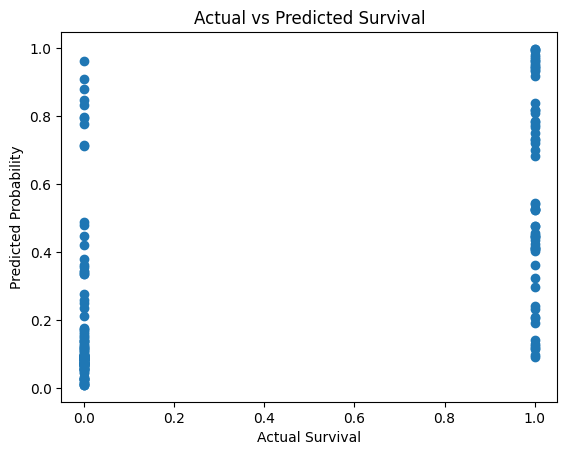

In [35]:
plt.scatter(y_test, test_predictions)
plt.xlabel("Actual Survival")
plt.ylabel("Predicted Probability")
plt.title("Actual vs Predicted Survival")
plt.show()


In [36]:
print("\nWeights:\n", w_final)
print("\nBias:\n", b_final)



Weights:
 [-0.0627392  -0.5139753  -0.22915721 ...  0.         -0.04642307
 -0.19373215]

Bias:
 -0.9029886796075778
